In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import hprModel as HPR
from smstools.models import stft as STFT

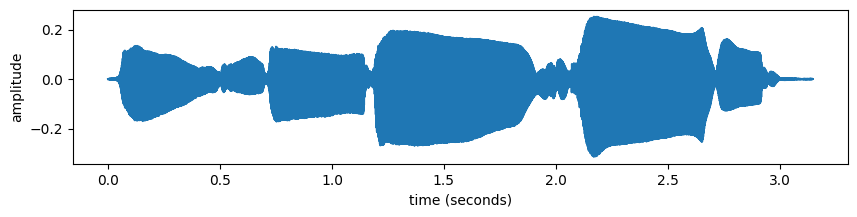

In [2]:
inputFile = '../sounds/sax-phrase-short.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

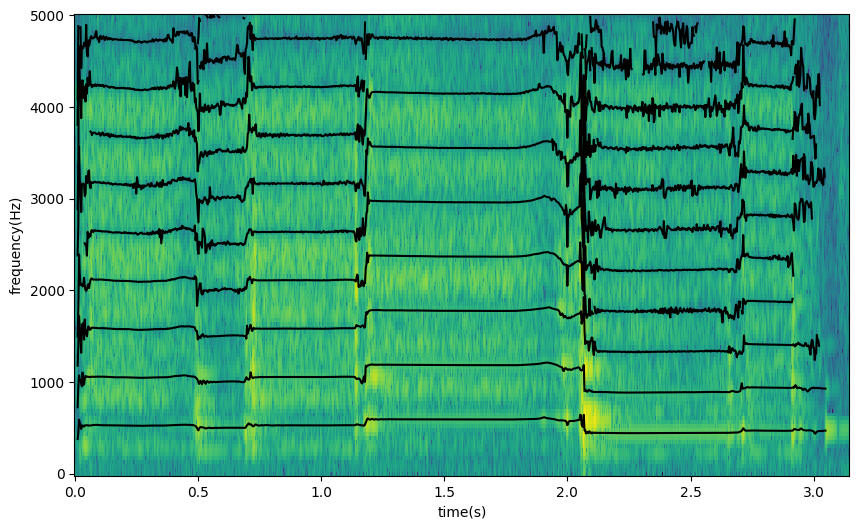

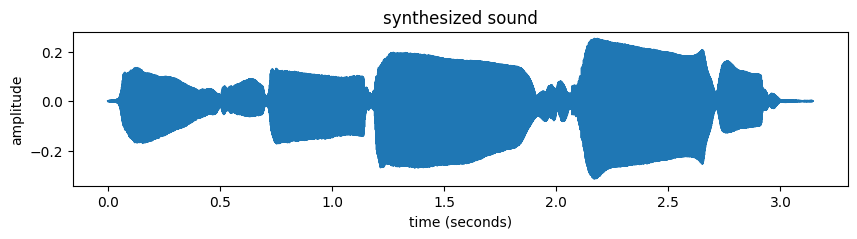

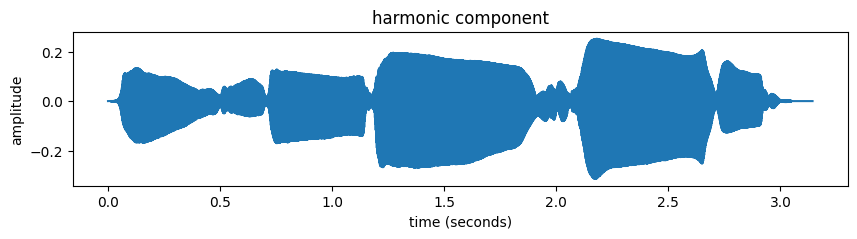

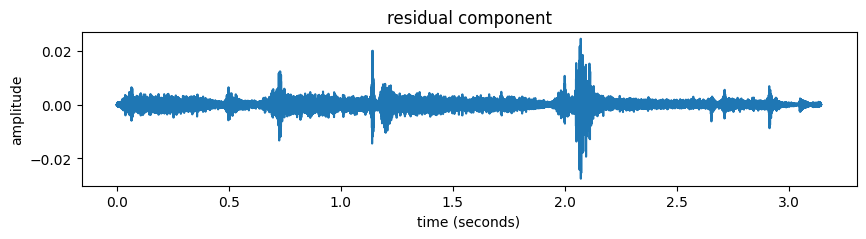

In [3]:
window="blackman"
M=601
N=1024
t=-100
minSineDur=0.1
nH=100
minf0=350
maxf0=700
f0et=5
harmDevSlope=0.01

Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128

w = get_window(window, M)
hfreq, hmag, hphase, xr = HPR.hprModelAnal(x, fs, w, N, H, t, minSineDur, nH, minf0, maxf0, f0et, harmDevSlope)
mXr, pXr = STFT.stftAnal(xr, w, N, H)
y, yh = HPR.hprModelSynth(hfreq, hmag, hphase, xr, Ns, H, fs)

plt.figure(figsize=(10, 6))
maxplotfreq = 5000.0

# plot the magnitude spectrogram of residual
maxplotbin = int(N * maxplotfreq / fs)
numFrames = int(mXr[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = np.arange(maxplotbin + 1) * float(fs) / N
plt.pcolormesh(frmTime, binFreq, np.transpose(mXr[:, : maxplotbin + 1]))
plt.autoscale(tight=True)
# plot harmonic frequencies on residual spectrogram
harms = hfreq * np.less(hfreq, maxplotfreq)
harms[harms == 0] = np.nan
numFrames = int(harms[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
plt.plot(frmTime, harms, color="k", ms=3, alpha=1)
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

# plot the output sound
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, y.size/fs, y.size)
plt.plot(time_indexes, y)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("synthesized sound")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))

# plot the harmonic component
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, yh.size/fs, yh.size)
plt.plot(time_indexes, yh)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("harmonic component")
plt.show()
ipd.display(ipd.Audio(data=yh, rate=fs))

# plot the residual sound
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, xr.size/fs, xr.size)
plt.plot(time_indexes, xr)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("residual component")
plt.show()
ipd.display(ipd.Audio(data=xr, rate=fs))
